<a href="https://colab.research.google.com/github/chantibabusambangi/video_compression_resources/blob/main/advanced_xgboost_video_compression_resources_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

# Define your file path
file_path = '/content/drive/MyDrive/task4/data_all.csv'

# Load CSV
df = pd.read_csv(file_path)

Mounted at /content/drive


In [2]:
len(df)

13263

In [3]:
df.head()


,Input,Resolution,FPS,Rate Ctrl,Bitrate,QP,Preset,Tune,Enc FPS,Y-PSNR,CPU,RAM,CPU Max Clock Speed
0,Tarun_Sports_1920x1080_29_97fps_420_8bit_0640,1920x1080,29.0,0,-1,36,8,psnr,13.092,37.54,99,396128KB,4.4GHz
1,Tarun_Sports_1920x1080_29_97fps_420_8bit_0640,1920x1080,29.0,0,-1,38,8,psnr,13.182,37.09,99,396160KB,4.4GHz
2,Tarun_Sports_1920x1080_29_97fps_420_8bit_0640,1920x1080,29.0,0,-1,42,8,psnr,13.770,36.29,99,394656KB,4.4GHz
3,Tarun_Sports_1920x1080_29_97fps_420_8bit_0640,1920x1080,29.0,0,-1,44,8,psnr,13.561,35.92,99,395868KB,4.4GHz
4,Tarun_Sports_1920x1080_29_97fps_420_8bit_0640,1920x1080,29.0,1,200,-1,8,psnr,18.916,29.28,99,487728KB,4.4GHz


In [4]:
df.dtypes

,0
Input,object
Resolution,object
FPS,float64
Rate Ctrl,int64
Bitrate,int64
QP,int64
Preset,int64
Tune,object
Enc FPS,float64
Y-PSNR,float64


In [5]:
df['RAM'] = df['RAM'].str.replace('KB', '', regex=False).astype(int)

In [112]:
df.dtypes

,0
Input,object
Resolution,object
FPS,float64
Rate Ctrl,int64
Bitrate,int64
QP,int64
Preset,int64
Tune,object
Enc FPS,float64
Y-PSNR,float64


In [6]:
df['CPU Max Clock Speed'] = df['CPU Max Clock Speed'].str.replace('GHz', '', regex=False).astype(float)


In [7]:
df.head()

,Input,Resolution,FPS,Rate Ctrl,Bitrate,QP,Preset,Tune,Enc FPS,Y-PSNR,CPU,RAM,CPU Max Clock Speed
0,Tarun_Sports_1920x1080_29_97fps_420_8bit_0640,1920x1080,29.0,0,-1,36,8,psnr,13.092,37.54,99,396128,4.4
1,Tarun_Sports_1920x1080_29_97fps_420_8bit_0640,1920x1080,29.0,0,-1,38,8,psnr,13.182,37.09,99,396160,4.4
2,Tarun_Sports_1920x1080_29_97fps_420_8bit_0640,1920x1080,29.0,0,-1,42,8,psnr,13.770,36.29,99,394656,4.4
3,Tarun_Sports_1920x1080_29_97fps_420_8bit_0640,1920x1080,29.0,0,-1,44,8,psnr,13.561,35.92,99,395868,4.4
4,Tarun_Sports_1920x1080_29_97fps_420_8bit_0640,1920x1080,29.0,1,200,-1,8,psnr,18.916,29.28,99,487728,4.4


In [8]:
df[['Width', 'Height']] = df['Resolution'].str.split('x', expand=True).astype(int)


In [9]:
print(df.isnull().sum())


Input                   0
Resolution              0
FPS                     0
Rate Ctrl               0
Bitrate                 0
QP                      0
Preset                  0
Tune                    0
Enc FPS                74
Y-PSNR                 72
CPU                     0
RAM                     0
CPU Max Clock Speed     0
Width                   0
Height                  0
dtype: int64


In [117]:

df.rename(columns={"\tCPU_Max_Clock_GHz": "CPU_Max_Clock_GHz"}, inplace=True)


In [10]:
df.dropna(subset=['Enc FPS', 'Y-PSNR'], inplace=True)
df.reset_index(drop=True, inplace=True)


In [15]:
df['RC_Mode'] = df['Rate Ctrl']
df['Value'] = df['QP']
df['Area'] = df['Width'] * df['Height']
df['Pixel_Rate'] = df['FPS'] * df['Area']


In [17]:
df.rename(columns={'Enc FPS': 'Enc_FPS'}, inplace=True)


In [18]:


input_features = ['FPS', 'RC_Mode', 'Value', 'Preset', 'Tune', 'Width', 'Height', 'Area', 'Pixel_Rate']
target_features = ['Enc_FPS', 'Y-PSNR', 'CPU', 'RAM']

In [20]:
df1 = pd.concat([X, y], axis=1)

In [21]:
df1.head()

,FPS,RC_Mode,Value,Preset,Tune,Width,Height,Area,Pixel_Rate,Enc_FPS,Y-PSNR,CPU,RAM
0,29.0,0,36,8,psnr,1920,1080,2073600,60134400.0,13.092,37.54,99,396128
1,29.0,0,38,8,psnr,1920,1080,2073600,60134400.0,13.182,37.09,99,396160
2,29.0,0,42,8,psnr,1920,1080,2073600,60134400.0,13.770,36.29,99,394656
3,29.0,0,44,8,psnr,1920,1080,2073600,60134400.0,13.561,35.92,99,395868
4,29.0,1,-1,8,psnr,1920,1080,2073600,60134400.0,18.916,29.28,99,487728


In [24]:
df['Tune'] = df['Tune'].map({'psnr': 0, 'visual_quality': 1})


In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.multioutput import MultiOutputRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
X = df[input_features]
y = df[target_features]
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ✅ 6️⃣ Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ 7️⃣ Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ✅ 8️⃣ Hyperparameter tuning with RandomizedSearchCV
param_dist = {
    'estimator__max_depth': [4, 6, 8],
    'estimator__learning_rate': [0.01, 0.05, 0.1],
    'estimator__n_estimators': [100, 250, 500],
    'estimator__subsample': [0.6, 0.8, 1.0],
    'estimator__colsample_bytree': [0.6, 0.8, 1.0]
}

xgb_base = XGBRegressor(objective='reg:squarederror', random_state=42)
multioutput_model = MultiOutputRegressor(xgb_base)

random_search = RandomizedSearchCV(
    multioutput_model,
    param_distributions=param_dist,
    n_iter=20,
    scoring='r2',
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

print("✅ Starting hyperparameter tuning...")
random_search.fit(X_train_scaled, y_train)
print("✅ Best parameters found:", random_search.best_params_)

# ✅ 9️⃣ Evaluate on test data
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

print("\n✅ Evaluation Metrics per Target:")
for idx, col in enumerate(target_features):
    mae = mean_absolute_error(y_test.iloc[:, idx], y_pred[:, idx])
    rmse = mean_squared_error(y_test.iloc[:, idx], y_pred[:, idx]) ** 0.5
    r2 = r2_score(y_test.iloc[:, idx], y_pred[:, idx])
    print(f"{col} ➔ MAE: {mae:.3f}, RMSE: {rmse:.3f}, R²: {r2:.3f}")

# ✅ Optional: View sample predictions
results = pd.DataFrame(y_pred, columns=[f"Pred_{col}" for col in target_features])
results[target_features] = y_test.reset_index(drop=True)
print("\n✅ Sample predictions:")
print(results.head())

✅ Starting hyperparameter tuning...
Fitting 3 folds for each of 20 candidates, totalling 60 fits
✅ Best parameters found: {'estimator__subsample': 1.0, 'estimator__n_estimators': 250, 'estimator__max_depth': 4, 'estimator__learning_rate': 0.05, 'estimator__colsample_bytree': 0.8}

✅ Evaluation Metrics per Target:
Enc_FPS ➔ MAE: 17.255, RMSE: 26.411, R²: 0.657
Y-PSNR ➔ MAE: 5.691, RMSE: 9.722, R²: 0.468
CPU ➔ MAE: 0.791, RMSE: 3.258, R²: 0.144
RAM ➔ MAE: 8445.835, RMSE: 16849.028, R²: 0.983

✅ Sample predictions:
   Pred_Enc_FPS  Pred_Y-PSNR   Pred_CPU       Pred_RAM  Enc_FPS  Y-PSNR  CPU  \
0     28.697609    41.873077  95.715805  321378.468750   27.611   48.94   95   
1     27.654156    42.522289  97.550591  133158.421875   30.226   39.53   99   
2     35.647415    45.856674  98.571045   94260.453125   12.380   50.39   99   
3     29.926613    50.946201  97.679680   42258.820312   67.755   44.31   94   
4     11.609401    40.191628  95.823593  429784.906250   10.050   41.77   99   

 

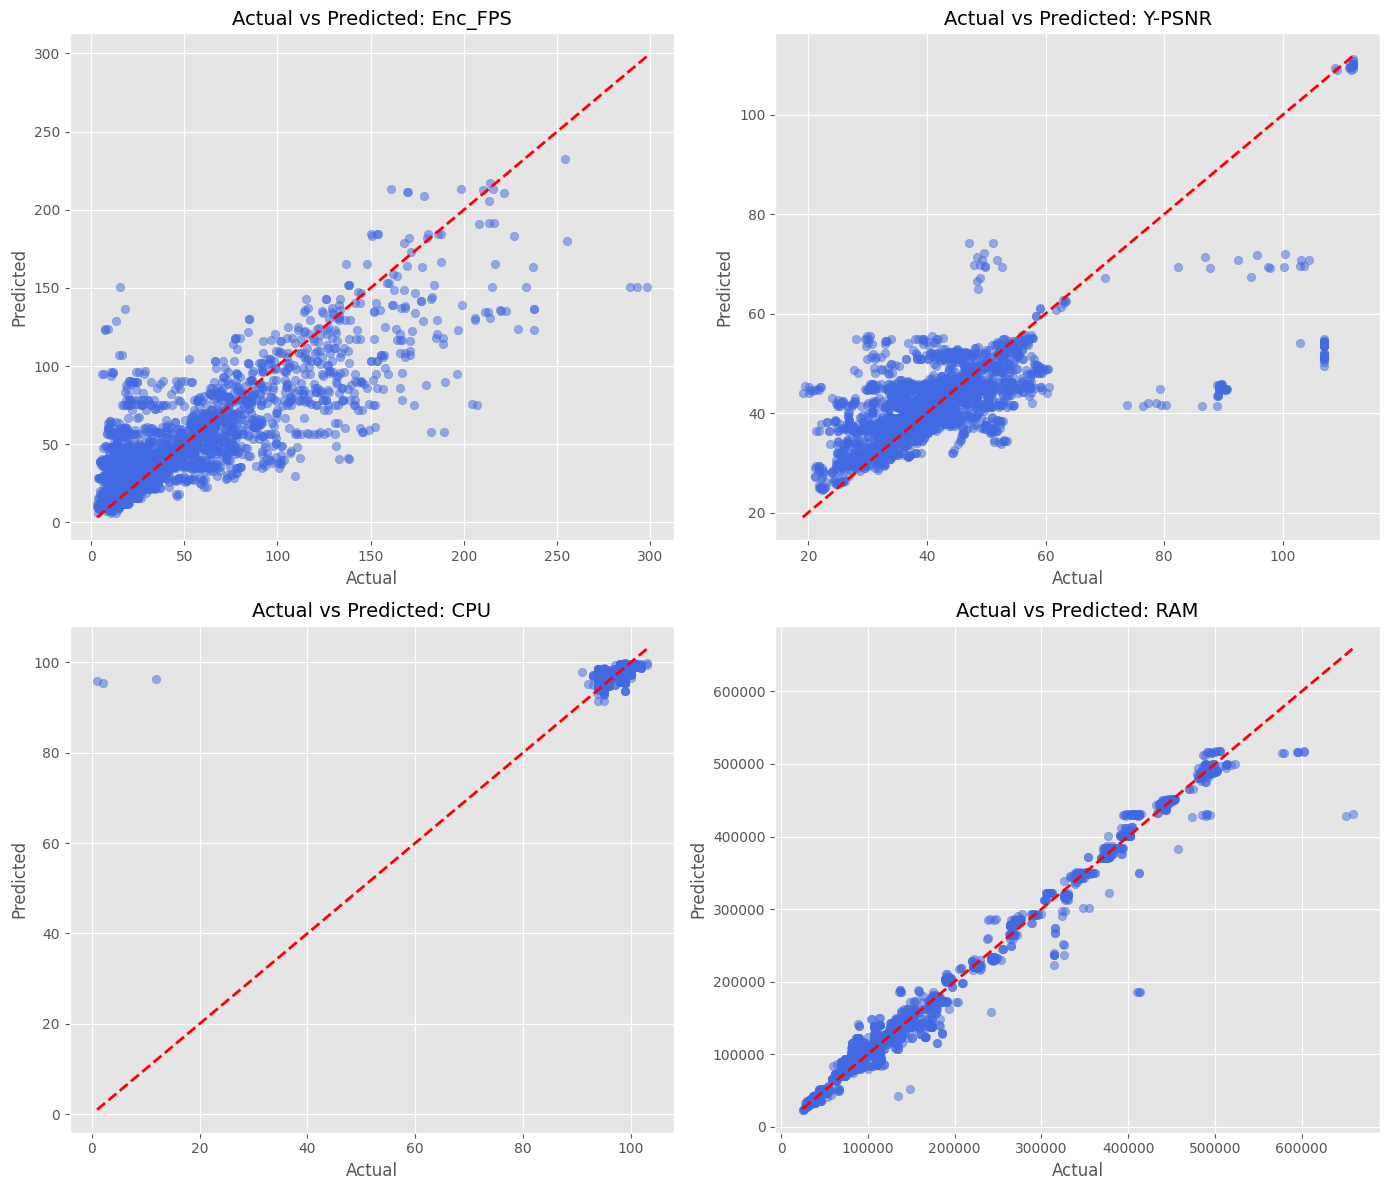

In [28]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')  # or 'classic', 'bmh', 'fivethirtyeight'
  # Applies Seaborn darkgrid styling

# Create subplots for each target feature
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.ravel()

for idx, col in enumerate(target_features):
    ax = axes[idx]
    ax.scatter(y_test.iloc[:, idx], y_pred[:, idx], alpha=0.5, color='royalblue')
    ax.plot([y_test.iloc[:, idx].min(), y_test.iloc[:, idx].max()],
            [y_test.iloc[:, idx].min(), y_test.iloc[:, idx].max()],
            'r--', lw=2)
    ax.set_title(f"Actual vs Predicted: {col}", fontsize=14)
    ax.set_xlabel("Actual", fontsize=12)
    ax.set_ylabel("Predicted", fontsize=12)

plt.tight_layout()
plt.show()


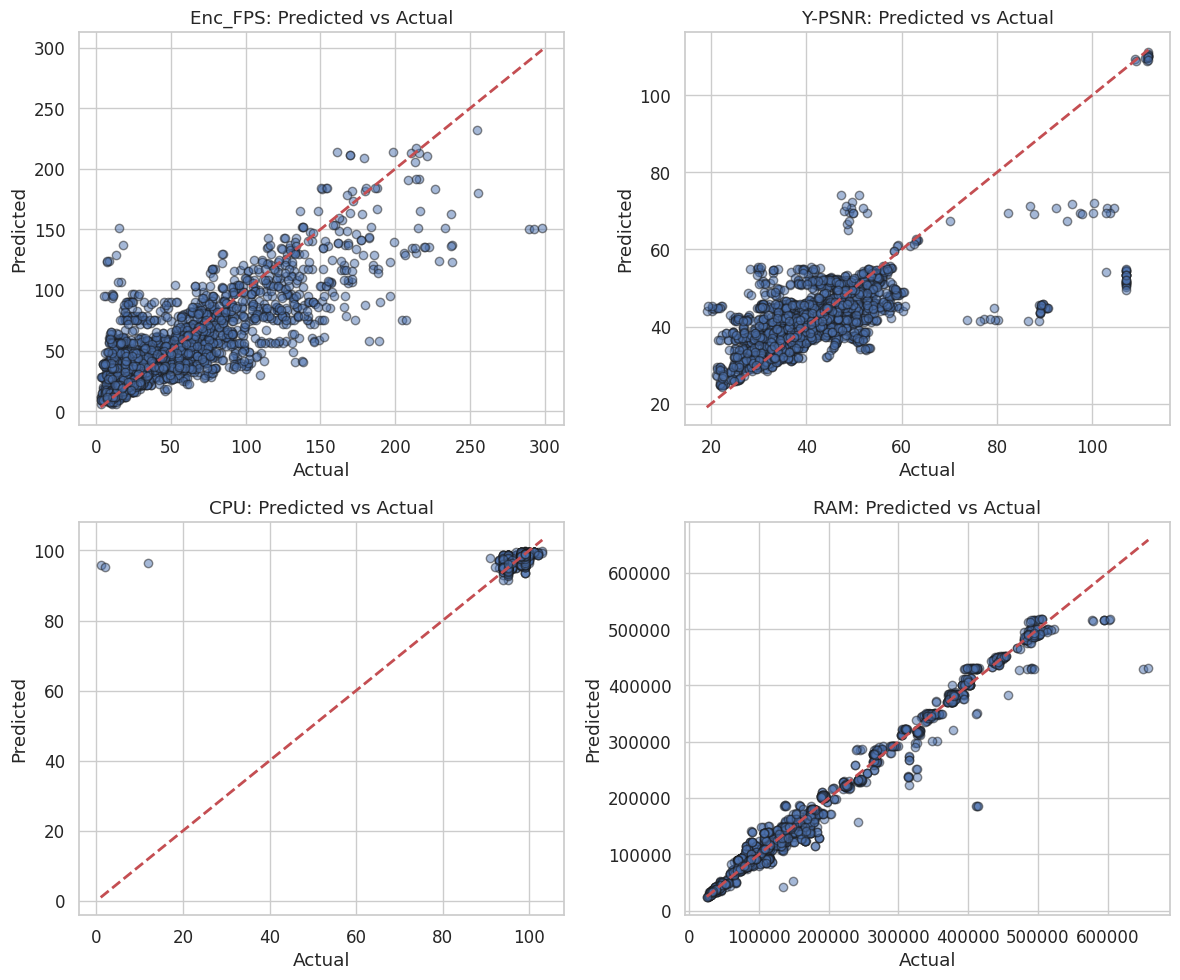

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure plots look clean
sns.set(style="whitegrid", font_scale=1.1)

# Create subplots: 2x2 for your 4 targets
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()  # flatten for easy iteration

for idx, col in enumerate(target_features):
    ax = axes[idx]
    ax.scatter(y_test.iloc[:, idx], y_pred[:, idx], alpha=0.5, edgecolor='k')
    ax.plot(
        [y_test.iloc[:, idx].min(), y_test.iloc[:, idx].max()],
        [y_test.iloc[:, idx].min(), y_test.iloc[:, idx].max()],
        'r--',
        lw=2
    )
    ax.set_title(f"{col}: Predicted vs Actual")
    ax.set_xlabel("Actual")
    ax.set_ylabel("Predicted")

plt.tight_layout()
plt.show()


In [32]:
!pip install lightgbm catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.0 MB/s eta 0:00:00


In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

# Assuming df, input_features, target_features already defined
X = df[input_features]
y = df[target_features]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Feature scaling (LGBM and CatBoost handle scaling well, but consistent scaling can help)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ----------------- CatBoost -----------------
print("\n✅ Training CatBoost...")

catboost_model = CatBoostRegressor(
    iterations=1000,
    learning_rate=0.05,
    depth=6,
    eval_metric='RMSE',
    random_seed=42,
    early_stopping_rounds=50,
    verbose=100
)

multi_catboost = MultiOutputRegressor(catboost_model)
multi_catboost.fit(X_train_scaled, y_train)
y_pred_catboost = multi_catboost.predict(X_test_scaled)

print("\n✅ CatBoost Results:")
for idx, col in enumerate(target_features):
    mae = mean_absolute_error(y_test.iloc[:, idx], y_pred_catboost[:, idx])
    rmse = mean_squared_error(y_test.iloc[:, idx], y_pred_catboost[:, idx]) ** 0.5
    r2 = r2_score(y_test.iloc[:, idx], y_pred_catboost[:, idx])
    print(f"{col} ➔ MAE: {mae:.3f}, RMSE: {rmse:.3f}, R²: {r2:.3f}")

# ----------------- LightGBM -----------------
print("\n✅ Training LightGBM with Hyperparameter Tuning...")

param_dist = {
    'estimator__num_leaves': [31, 50, 70],
    'estimator__learning_rate': [0.01, 0.05, 0.1],
    'estimator__n_estimators': [100, 250, 500],
    'estimator__subsample': [0.6, 0.8, 1.0],
    'estimator__colsample_bytree': [0.6, 0.8, 1.0]
}

lgbm_base = LGBMRegressor(random_state=42)
multi_lgbm = MultiOutputRegressor(lgbm_base)

random_search = RandomizedSearchCV(
    multi_lgbm,
    param_distributions=param_dist,
    n_iter=20,
    scoring='r2',
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train_scaled, y_train)
print("✅ Best LGBM parameters found:", random_search.best_params_)

best_lgbm_model = random_search.best_estimator_
y_pred_lgbm = best_lgbm_model.predict(X_test_scaled)

print("\n✅ LightGBM Results:")
for idx, col in enumerate(target_features):
    mae = mean_absolute_error(y_test.iloc[:, idx], y_pred_lgbm[:, idx])
    rmse = mean_squared_error(y_test.iloc[:, idx], y_pred_lgbm[:, idx]) ** 0.5
    r2 = r2_score(y_test.iloc[:, idx], y_pred_lgbm[:, idx])
    print(f"{col} ➔ MAE: {mae:.3f}, RMSE: {rmse:.3f}, R²: {r2:.3f}")

# ----------------- Optional: View sample predictions -----------------
results = pd.DataFrame(y_pred_lgbm, columns=[f"LGBM_Pred_{col}" for col in target_features])
results[[f"CatBoost_Pred_{col}" for col in target_features]] = y_pred_catboost
results[target_features] = y_test.reset_index(drop=True)

print("\n✅ Sample predictions:")
print(results.head())



✅ Training CatBoost...
0:	learn: 45.0985663	total: 50.5ms	remaining: 50.5s
100:	learn: 28.2033869	total: 832ms	remaining: 7.4s
200:	learn: 27.0399528	total: 1.6s	remaining: 6.35s
300:	learn: 26.6064656	total: 2.29s	remaining: 5.32s
400:	learn: 26.3990769	total: 3.08s	remaining: 4.61s
500:	learn: 26.2829981	total: 3.8s	remaining: 3.79s
600:	learn: 26.2066661	total: 4.42s	remaining: 2.94s
700:	learn: 26.1506423	total: 5.42s	remaining: 2.31s
800:	learn: 26.1139626	total: 6.5s	remaining: 1.61s
900:	learn: 26.0855271	total: 7.82s	remaining: 860ms
999:	learn: 26.0625716	total: 8.85s	remaining: 0us
0:	learn: 13.2549650	total: 3.45ms	remaining: 3.44s
100:	learn: 10.3371634	total: 667ms	remaining: 5.94s
200:	learn: 10.0752404	total: 1.48s	remaining: 5.87s
300:	learn: 9.9524068	total: 2.29s	remaining: 5.32s
400:	learn: 9.9109810	total: 3.22s	remaining: 4.81s
500:	learn: 9.8886406	total: 3.79s	remaining: 3.78s
600:	learn: 9.8746087	total: 4.38s	remaining: 2.91s
700:	learn: 9.8653049	total: 5.04s

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000318 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 167
[LightGBM] [Info] Number of data points in the train set: 10551, number of used features: 9
[LightGBM] [Info] Start training from score 51.490662
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000317 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 167
[LightGBM] [Info] Number of data points in the train set: 10551, number of used features: 9
[LightGBM] [Info] Start training from score 42.441583
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000793 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 167
[LightGBM] [Info] Number 

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000182 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 167
[LightGBM] [Info] Number of data points in the train set: 10551, number of used features: 9
[LightGBM] [Info] Start training from score 160737.573690
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
✅ Best LGBM parameters found: {'estimator__subsample': 0.6, 'estimator__num_leaves': 70, 'estimator__n_estimators': 500, 'estimator__learning_rate': 0.01, 'estimator__colsample_bytree': 0.6}


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



✅ LightGBM Results:
Enc_FPS ➔ MAE: 16.971, RMSE: 26.497, R²: 0.654
Y-PSNR ➔ MAE: 5.734, RMSE: 9.973, R²: 0.440
CPU ➔ MAE: 0.786, RMSE: 3.274, R²: 0.136
RAM ➔ MAE: 8747.570, RMSE: 17283.621, R²: 0.982

✅ Sample predictions:
   LGBM_Pred_Enc_FPS  LGBM_Pred_Y-PSNR  LGBM_Pred_CPU  LGBM_Pred_RAM  \
0          27.161905         42.420481      95.820028  319681.656920   
1          27.193758         42.590715      97.572418  144685.855117   
2          36.360073         47.646774      98.591838   94553.111232   
3          31.405873         51.519129      97.576810   45346.545238   
4          12.444732         40.833115      90.047759  427691.029415   

   CatBoost_Pred_Enc_FPS  CatBoost_Pred_Y-PSNR  CatBoost_Pred_CPU  \
0              28.017604             42.470881          95.548489   
1              23.864636             42.482126          97.783106   
2              34.931201             47.736543          98.601694   
3              30.151289             51.362458          97.582992  

In [34]:
#advanced tuning of xgboost
!pip install optuna xgboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.9/395.9 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.0/247.0 kB 22.5 MB/s eta 0:00:00


In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor
import optuna

# ---------------- Feature Engineering ----------------
df['Aspect_Ratio'] = df['Width'] / df['Height']
df['Log_Pixel_Rate'] = np.log1p(df['Pixel_Rate'])
df['FPS_Preset'] = df['FPS'] * df['Preset']
df['RC_Tune'] = df['RC_Mode'] * df['Tune']

#if row was bitrate(rcmode=2)
if 'Bitrate' in df.columns:
    df['Bitrate_per_Pixel'] = df['Bitrate'] / (df['Width'] * df['Height'])


# Update input features
feature_candidates = ['FPS', 'RC_Mode', 'Value', 'Preset', 'Tune',
                      'Width', 'Height', 'Area', 'Pixel_Rate',
                      'Aspect_Ratio', 'Log_Pixel_Rate', 'FPS_Preset', 'RC_Tune']

if 'Bitrate_per_Pixel' in df.columns:
    feature_candidates.append('Bitrate_per_Pixel')

X = df[feature_candidates]
y = df[target_features]

# ---------------- Train-Test Split ----------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ---------------- Scaling ----------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ---------------- Optuna Objective Function ----------------
def objective(trial):
    param = {
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2, log=True),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 5),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 5),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 5),
        'random_state': 42,
        'objective': 'reg:squarederror',
        'tree_method': 'hist',
    }

    model = MultiOutputRegressor(XGBRegressor(**param))

    kf = KFold(n_splits=3, shuffle=True, random_state=42)
    rmses = []
    for train_idx, valid_idx in kf.split(X_train_scaled):
        X_tr, X_val = X_train_scaled[train_idx], X_train_scaled[valid_idx]
        y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[valid_idx]
        model.fit(X_tr, y_tr)
        y_pred = model.predict(X_val)
        rmse = mean_squared_error(y_val, y_pred, multioutput='raw_values') ** 0.5
        rmses.append(np.mean(rmse))

    return np.mean(rmses)

# ---------------- Running Optuna ----------------
print("✅ Starting Optuna hyperparameter tuning...")
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100, timeout=3600)  # Adjust timeout as needed

print("✅ Best parameters found:")
print(study.best_params)

# ---------------- Train Best Model ----------------
best_params = study.best_params
best_params.update({
    'objective': 'reg:squarederror',
    'random_state': 42,
    'tree_method': 'hist',
})

final_model = MultiOutputRegressor(XGBRegressor(**best_params))
final_model.fit(X_train_scaled, y_train)
y_pred = final_model.predict(X_test_scaled)

# ---------------- Evaluation ----------------
print("\n✅ Evaluation Metrics per Target:")
for idx, col in enumerate(target_features):
    mae = mean_absolute_error(y_test.iloc[:, idx], y_pred[:, idx])
    rmse = mean_squared_error(y_test.iloc[:, idx], y_pred[:, idx]) ** 0.5
    r2 = r2_score(y_test.iloc[:, idx], y_pred[:, idx])
    print(f"{col} ➔ MAE: {mae:.3f}, RMSE: {rmse:.3f}, R²: {r2:.3f}")

# ---------------- Optional: Sample Predictions ----------------
results = pd.DataFrame(y_pred, columns=[f"Pred_{col}" for col in target_features])
results[target_features] = y_test.reset_index(drop=True)
print("\n✅ Sample predictions:")
print(results.head())


[I 2025-07-16 12:38:07,379] A new study created in memory with name: no-name-fe918204-12fd-4ac4-bb7b-9df6843868c6


✅ Starting Optuna hyperparameter tuning...


[I 2025-07-16 12:38:49,253] Trial 0 finished with value: 4034.6533203125 and parameters: {'max_depth': 10, 'learning_rate': 0.09370731965096411, 'n_estimators': 966, 'subsample': 0.7018512012591138, 'colsample_bytree': 0.9743282022412058, 'gamma': 0.929937046498448, 'reg_alpha': 2.1761975795436954, 'reg_lambda': 4.97203505004657}. Best is trial 0 with value: 4034.6533203125.
[I 2025-07-16 12:38:59,796] Trial 1 finished with value: 3547.414794921875 and parameters: {'max_depth': 8, 'learning_rate': 0.01099634361409054, 'n_estimators': 501, 'subsample': 0.8992371089466261, 'colsample_bytree': 0.6518266710080082, 'gamma': 4.615697342607911, 'reg_alpha': 0.8504459598289771, 'reg_lambda': 4.175808048690393}. Best is trial 1 with value: 3547.414794921875.
[I 2025-07-16 12:39:34,906] Trial 2 finished with value: 4035.292236328125 and parameters: {'max_depth': 10, 'learning_rate': 0.037190980001448465, 'n_estimators': 604, 'subsample': 0.7796659799223246, 'colsample_bytree': 0.9810956270822907

✅ Best parameters found:
{'max_depth': 5, 'learning_rate': 0.02105358739099512, 'n_estimators': 956, 'subsample': 0.9973612941437495, 'colsample_bytree': 0.8788557717666352, 'gamma': 3.1593221143059473, 'reg_alpha': 0.24822487475570346, 'reg_lambda': 2.5446760916401994}

✅ Evaluation Metrics per Target:
Enc_FPS ➔ MAE: 16.041, RMSE: 26.172, R²: 0.663
Y-PSNR ➔ MAE: 5.494, RMSE: 9.921, R²: 0.446
CPU ➔ MAE: 0.754, RMSE: 2.946, R²: 0.300
RAM ➔ MAE: 6703.489, RMSE: 15274.220, R²: 0.986

✅ Sample predictions:
   Pred_Enc_FPS  Pred_Y-PSNR   Pred_CPU       Pred_RAM  Enc_FPS  Y-PSNR  CPU  \
0     28.304913    42.035534  95.955688  324277.375000   27.611   48.94   95   
1     30.800591    39.518379  97.890335  133693.796875   30.226   39.53   99   
2     27.957777    49.364365  98.622574   96008.195312   12.380   50.39   99   
3     30.492413    52.493088  97.775917   42663.054688   67.755   44.31   94   
4     11.557625    41.221699  95.266647  432441.156250   10.050   41.77   99   

      RAM  

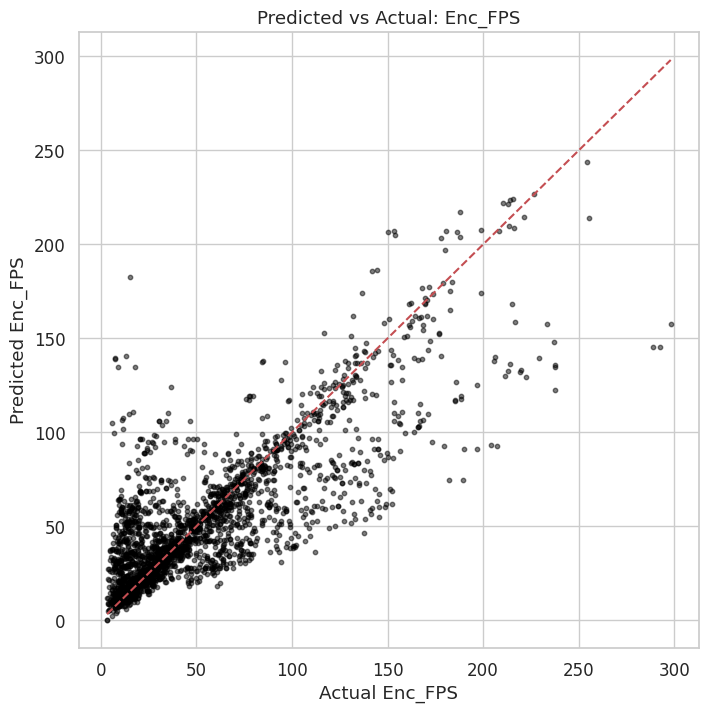

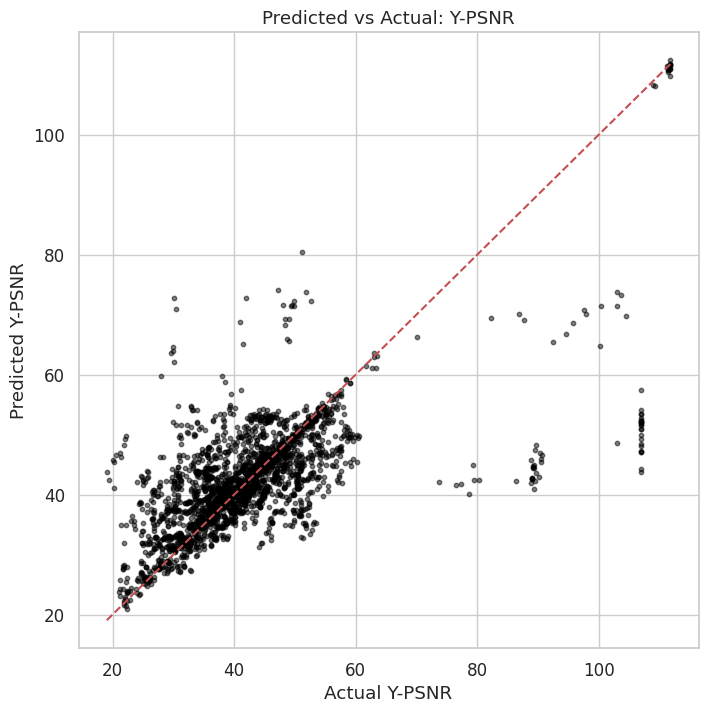

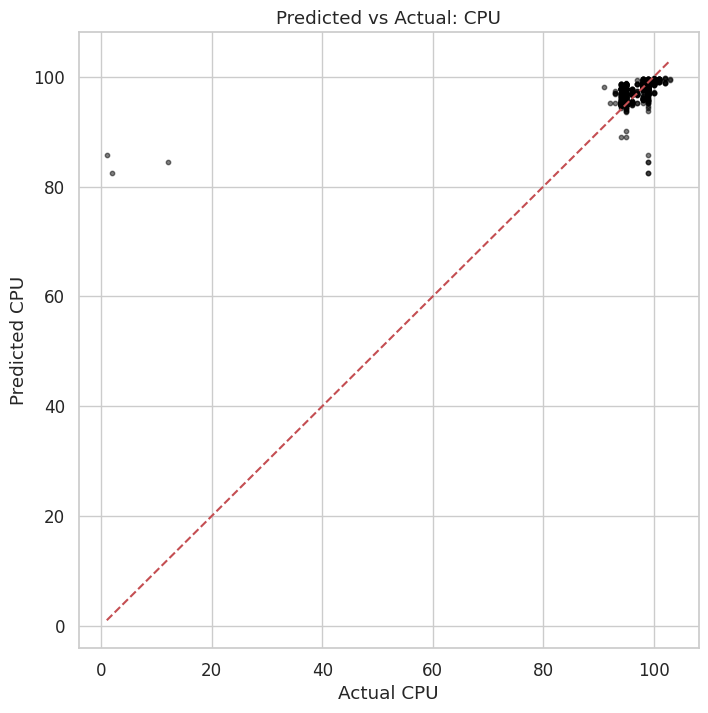

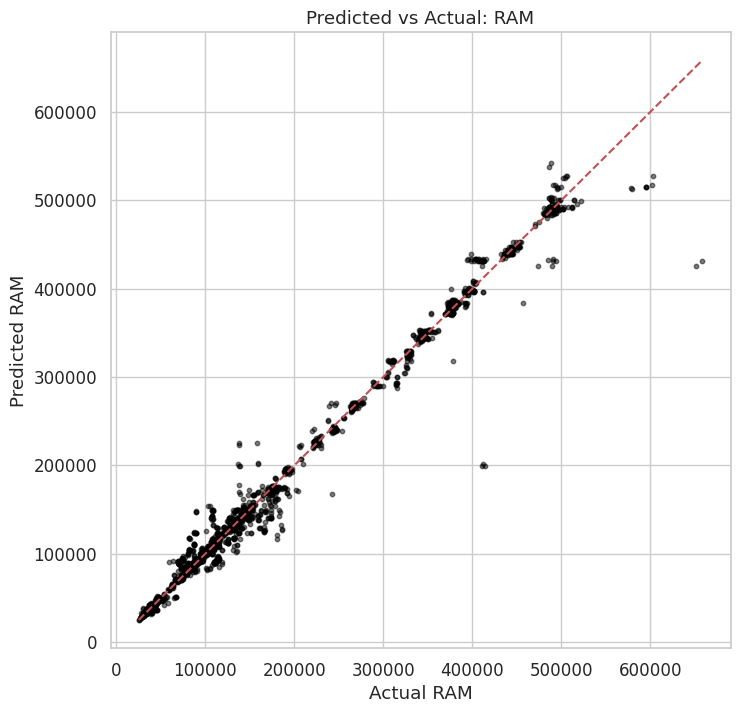

In [37]:
import matplotlib.pyplot as plt

# If y_pred is not computed yet:
# y_pred = final_model.predict(X_test_scaled)

for idx, col in enumerate(target_features):
    plt.figure(figsize=(8,8))
    plt.scatter(y_test.iloc[:, idx], y_pred[:, idx], alpha=0.5, s=10,color='black')
    plt.plot(
        [y_test.iloc[:, idx].min(), y_test.iloc[:, idx].max()],
        [y_test.iloc[:, idx].min(), y_test.iloc[:, idx].max()],
        'r--'
    )
    plt.xlabel(f'Actual {col}')
    plt.ylabel(f'Predicted {col}')
    plt.title(f'Predicted vs Actual: {col}')
    plt.grid(True)
    plt.show()
